In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import geopandas

/usr/local/lib/python3.6/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
olist = pd.read_csv('olist_dataset.csv', sep=',')
data = geopandas.read_file('dados.json', driver='GeoJSON')

In [3]:
olist.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,...,seller_id,shipping_limit_date,price,freight_value,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,a9516a079e37a9c9c36b9b78b10169e8,moveis_escritorio,41.0,1141.0,1.0,...,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,4aa6014eceb682077f9dc4bffebc05b0,utilidades_domesticas,43.0,1002.0,3.0,...,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00


In [4]:
olist.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'product_id',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'order_item_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date'],
      dtype='object')

In [5]:
olist['order_purchase_timestamp'] = pd.to_datetime(olist['order_purchase_timestamp'])
olist['ano'] = olist['order_purchase_timestamp'].apply(lambda x: x.year)

In [6]:
olist.sort_values(by=['ano'], inplace=True)

In [7]:
data.head(2)

,id,dat_nsc,renda,latitude,longitude,ano,mes,dia,hora,idade,geracoes,index_right,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,qtd_cliente,geometry
0,d6c0cc1d-eb61-486a-b5c3-50725ef44d61,1981-01-30T00:00:00,"DE R$ 1.900,00 A R$ 3.800,00",-4.847580,-37.784390,1981.0,1.0,30.0,0.0,40.0,1980 a 1994 - Geração Y,985,2307007,Jaguaruana,CE,854.362,1.0,POINT (-37.78439 -4.84758)
1,da0067e7-aa6b-4355-b373-ca17f6ac3b44,1978-01-28T00:00:00,"DE R$ 3.800,00 A R$ 7.600,00",-26.990118,-48.637165,1978.0,1.0,28.0,0.0,43.0,1960 a 1979 - Geração X,4337,4202008,Balneário Camboriú,SC,45.214,13.0,POINT (-48.63717 -26.99012)


In [8]:
data.columns

Index(['id', 'dat_nsc', 'renda', 'latitude', 'longitude', 'ano', 'mes', 'dia',
       'hora', 'idade', 'geracoes', 'index_right', 'CD_MUN', 'NM_MUN',
       'SIGLA_UF', 'AREA_KM2', 'qtd_cliente', 'geometry'],
      dtype='object')

In [9]:
data.shape

(8681, 18)

In [10]:
data.isnull().sum()

id             0
dat_nsc        0
renda          0
latitude       0
longitude      0
ano            0
mes            0
dia            0
hora           0
idade          0
geracoes       0
index_right    0
CD_MUN         0
NM_MUN         0
SIGLA_UF       0
AREA_KM2       0
qtd_cliente    0
geometry       0
dtype: int64

In [11]:
olist = olist.rename(columns={"customer_state": "SIGLA_UF"})

In [12]:
olist.head(1)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,SIGLA_UF,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,...,shipping_limit_date,price,freight_value,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,ano
33819,bf3143805b420affe47047794eae0872,b139fbdcd53f8036eb05d3023fc97580,13390,rio das pedras,SP,a18c130946b89ab774bc5948fe71e2a5,consoles_games,53.0,520.0,6.0,...,2016-10-21 16:24:25,15.0,10.96,invoiced,2016-10-06 14:36:59,2016-10-06 15:41:47,NaN,NaN,2016-11-28 00:00:00,2016


In [13]:
olist['preco_medio_uf'] = olist['price'].groupby(olist['SIGLA_UF']).transform('mean')

In [14]:
olist.preco_medio_uf.describe()

count    117601.000000
mean        120.824783
std          14.106826
min         109.917418
25%         109.917418
50%         120.225607
75%         124.849231
max         193.624945
Name: preco_medio_uf, dtype: float64

In [15]:
olist.product_category_name.unique()

array(['consoles_games', 'informatica_acessorios', 'brinquedos',
       'cama_mesa_banho', 'ferramentas_jardim', 'perfumaria',
       'moveis_decoracao', 'beleza_saude', 'cool_stuff',
       'fashion_bolsas_e_acessorios', 'climatizacao', nan,
       'industria_comercio_e_negocios', 'fashion_roupa_feminina',
       'moveis_escritorio', 'utilidades_domesticas', 'esporte_lazer',
       'market_place', 'automotivo', 'alimentos', 'telefonia',
       'eletronicos', 'relogios_presentes', 'telefonia_fixa', 'bebes',
       'fashion_calcados', 'audio', 'pet_shop', 'livros_interesse_geral',
       'livros_tecnicos', 'fashion_roupa_masculina', 'fraldas_higiene',
       'papelaria', 'livros_importados', 'sinalizacao_e_seguranca',
       'casa_conforto', 'eletroportateis', 'eletrodomesticos_2',
       'malas_acessorios', 'moveis_sala', 'artigos_de_natal',
       'eletrodomesticos', 'construcao_ferramentas_jardim',
       'construcao_ferramentas_construcao', 'casa_construcao',
       'moveis_cozinha_

<AxesSubplot:>

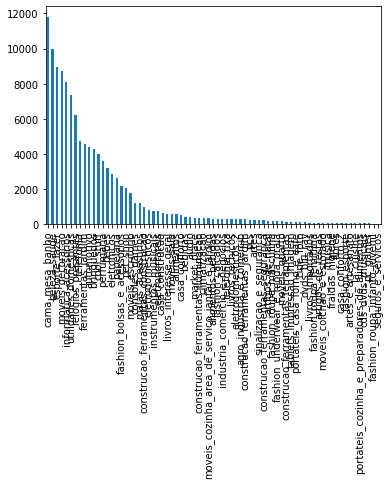

In [16]:
olist['product_category_name'].value_counts().plot(kind = 'bar')

In [28]:
#Vamos criar uma função que retorna uma lista de produtos mais comprados em relação o seu preço por Estado
def busca_produto_uf(uf):
    prod_uf = olist[olist['SIGLA_UF'] == uf]
    prod_uf = prod_uf.groupby(['product_category_name']).price.mean()
    prod_uf10 = prod_uf.nlargest(10)
    prod_uf10_df = pd.DataFrame(data=prod_uf10)
    produtos = list(prod_uf10_df.index)
 
    return produtos

In [27]:
#Top 10 produtos do RJ
prod_uf_rj =  busca_produto_uf('RJ')
print(prod_uf_rj)
se = pd.Series(prod_uf_rj)
se.values
print(se.values)

['pcs', 'eletrodomesticos_2', 'portateis_casa_forno_e_cafe', 'telefonia_fixa', 'eletroportateis', 'instrumentos_musicais', 'climatizacao', 'agro_industria_e_comercio', 'relogios_presentes', 'construcao_ferramentas_construcao']
['pcs' 'eletrodomesticos_2' 'portateis_casa_forno_e_cafe' 'telefonia_fixa'
 'eletroportateis' 'instrumentos_musicais' 'climatizacao'
 'agro_industria_e_comercio' 'relogios_presentes'
 'construcao_ferramentas_construcao']


In [20]:
#Cria uma nova coluna com as top 10 categorias de produtos que os clientes mais gastam dinheiro por Estado
for uf in olist.SIGLA_UF.unique():
    olist_prod =  busca_produto_uf(uf)
    olist.loc[olist["SIGLA_UF"] == uf,"top10_produtos",] = str(olist_prod)

In [21]:
#olist = olist.drop(columns=['category'])
olist.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,SIGLA_UF,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,...,freight_value,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,ano,preco_medio_uf,top10_produtos
33819,bf3143805b420affe47047794eae0872,b139fbdcd53f8036eb05d3023fc97580,13390,rio das pedras,SP,a18c130946b89ab774bc5948fe71e2a5,consoles_games,53.0,520.0,6.0,...,10.96,invoiced,2016-10-06 14:36:59,2016-10-06 15:41:47,NaN,NaN,2016-11-28 00:00:00,2016,109.917418,"['pcs', 'portateis_casa_forno_e_cafe', 'eletro..."
17106,3140c5d46f2d38e4f14a9675359d6a27,7f3ae1ea298c60b1a19751a1ded40199,91260,porto alegre,RS,f9bcf9d8e89d012d7dc24fe4de0abd80,informatica_acessorios,36.0,398.0,1.0,...,18.65,invoiced,2016-10-10 17:16:03,2016-10-12 03:01:52,NaN,NaN,2016-12-06 00:00:00,2016,121.457066,"['pcs', 'portateis_cozinha_e_preparadores_de_a..."
51468,663c23427108785957931a3ac88f6085,2e15add79c76241beffe812a24ad3a31,22745,rio de janeiro,RJ,8adc1d29aa4fd4d758a91ef997c8a0a2,brinquedos,46.0,303.0,1.0,...,16.70,delivered,2016-10-04 16:41:59,2016-10-06 15:55:55,2016-10-24 07:05:30,2016-10-29 12:53:41,2016-11-28 00:00:00,2016,124.849231,"['pcs', 'eletrodomesticos_2', 'portateis_casa_..."
7221,92da31c4d9d81552801e3c1a6194b796,b74deaa44a000da4ce9bf2913cb8e232,58305,bayeux,PB,dd6a505f83dd3c6326aa9856519e0978,brinquedos,43.0,623.0,5.0,...,24.84,delivered,2016-10-10 00:01:50,2016-10-11 10:44:13,2016-10-14 18:00:00,2016-11-16 17:17:53,2016-12-14 00:00:00,2016,193.624945,"['pcs', 'eletrodomesticos', 'industria_comerci..."
114338,01415cfeb907d8ce0e17075b4c097fe9,c2154b6ca788852f644e6f56dc7abbe9,5409,sao paulo,SP,895fc53d66ecb6c1afc40138dbc2a73c,cama_mesa_banho,48.0,330.0,3.0,...,15.11,delivered,2016-10-09 23:50:37,2016-10-10 11:04:05,2016-10-25 13:55:42,2016-10-31 11:54:44,2016-12-02 00:00:00,2016,109.917418,"['pcs', 'portateis_casa_forno_e_cafe', 'eletro..."


In [22]:
len(olist.top10_produtos.unique())

27

In [23]:
olist.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'SIGLA_UF', 'product_id', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'order_id',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'order_item_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date', 'ano',
       'preco_medio_uf', 'top10_produtos'],
      dtype='object')

In [26]:
#Vamos criar uma função que retorna uma lista de produtos mais comprados em relação o seu preço por Estado
def busca_tipopagamento_uf(uf):
    prod_uf = olist[olist['SIGLA_UF'] == uf]
    prod_uf = prod_uf.groupby(['payment_type']).price.mean()
    prod_uf10 = prod_uf.nlargest(10)
    prod_uf10_df = pd.DataFrame(data=prod_uf10)
    produtos = list(prod_uf10_df.index)
 
    return produtos

AttributeError: 'Series' object has no attribute 'values_count'

In [ ]:
data.columns

In [ ]:
data.geracoes.unique()

In [ ]:
data_rj = data[data['SIGLA_UF'] == 'RJ']

In [ ]:
import folium

In [ ]:
# Cria o Mapa
fmap = folium.Map(
                location=[-16.1237611, -59.9219642],   
                zoom_start=4,
                control_scale=True,
                prefer_canvas=True)

In [ ]:
geracoes = folium.map.FeatureGroup()
latitudes = list(data_rj.latitude)
longitudes = list(data_rj.longitude)
labels = list(data_rj.geracoes)
for lat, lng, label in zip(latitudes, longitudes, labels):
    if label == '1960 a 1979 - Geração X':
        folium.Marker(
        location = [lat, lng], 
          popup = label,
          icon = folium.Icon(color='red', icon='o')
         ).add_to(fmap)
    elif label == '1900 a 1940 - Veteranos':
        folium.Marker(
        location = [lat, lng], 
          popup = label,
          icon = folium.Icon(color='black', icon='o')
         ).add_to(fmap)
    elif label == '1940 a 1959 - Baby Boomers ':
        folium.Marker(
        location = [lat, lng], 
          popup = label,
          icon = folium.Icon(color='blue', icon='o')
         ).add_to(fmap)
    elif label == '1980 a 1994 - Geração Y':
        folium.Marker(
        location = [lat, lng], 
          popup = label,
          icon = folium.Icon(color='pink', icon='o')
         ).add_to(fmap)
    else:
        folium.Marker(
          location = [lat, lng], 
          popup = label,
          icon = folium.Icon(color='green', icon='o')
         ).add_to(fmap)

In [ ]:
fmap.add_child(geracoes)
fmap

In [ ]:
fmap.save(outfile= "geracoes_rj.html")